In [1]:
%matplotlib inline

In [2]:
if True: 
    import matplotlib.pylab as plt
    import numpy as np


In [3]:
def openfile(fname):
    f =  open(fname, 'r')

    line = f.next()
    a = (line.strip().split(" "))
    a = [b for b in a if b]

    Nx = int(a[0])
    Ny = int(a[1])
    Nz = int(a[2])

    Sx = float(a[3])
    Sy = float(a[4])
    Sz = float(a[5])

    Ox = float(a[6])
    Oy = float(a[7])
    Oz = float(a[8])

    line = f.next()
    a = (line.strip().split(" "))
    a = [b for b in a if b]
    nvar = int(a[0])

    line = f.next()
    a = (line.strip().split(" "))
    a = [b for b in a if b]
    name_of_variable_1 = (a[0])
    print name_of_variable_1,
    
    facies = np.zeros([Nx, Ny])
    for i in range(Ny):
        for j in range(Nx):
            facies[i, j] = int(f.next().split()[0])
            
    return facies, Nx, Ny

In [4]:
TI, nx,ny = openfile("ti.gslib")

veg


In [5]:
test_real00000 ,  nx, ny = openfile("smallOutput/test_real00000.gslib")

veg_real00000


In [6]:
nx =  100
ny = nx

TI = TI[:nx, :ny]
test_real00000 = test_real00000[:nx, :ny]

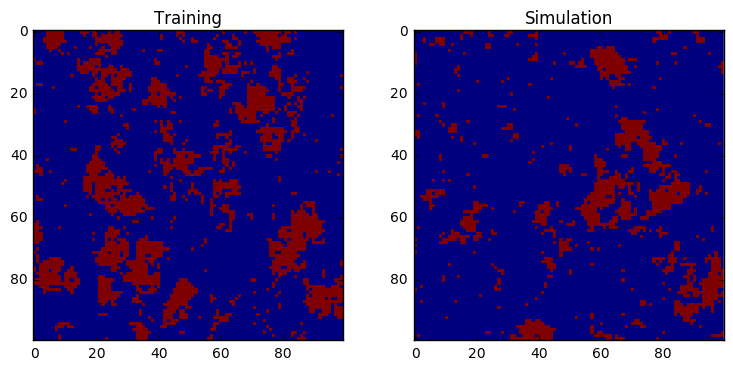

In [36]:
fig = plt.figure(figsize = (9,4))
ax = fig.add_subplot(121)
plt.imshow(TI, interpolation='none')
plt.title('Training')
ax = fig.add_subplot(122)
plt.imshow(test_real00000, interpolation='none')
plt.title('Simulation')

In [37]:
import pysal
import numpy as np
np.random.seed(12345)
import time

from pysal.esda.getisord import G
from pysal import Moran

In [38]:
# weight options:
# w = pysal.threshold_binaryW_from_array(data, 2)
# w = pysal.threshold_continuousW_from_array(data, 3, alpha = -1)
# w = pysal.Kernel(data, fixed = False, function = 'gaussian')

In [10]:
x,y=np.indices((nx,ny))
x.shape=(nx**2,1)
y.shape=(ny**2,1)
data=np.hstack([x,y])

start_time = time.time()
w = pysal.weights.Distance.DistanceBand(data, 1, binary = 'True')
print time.time() - start_time


0.190613031387


In [11]:
start_time = time.time()
g = G(TI, w)
# print "Time elapsed {0:.2f}s".format(time.time() - start_time)
print "Getis and Ord’s G : {0:.4f}, (z_sim={1:.4f}, p_z_sim={2:.4f}) ".format( g.G,
            g.z_sim, g.p_sim)

Gi = g.G


Getis and Ord’s G : 0.0012, (z_sim=85.0539, p_z_sim=0.0010) 


In [12]:
start_time = time.time()
I = Moran(TI, w)
# print "Time elapsed {0:.2f}s".format(time.time() - start_time)
print "Moran's I: {0:.4f}, (z_sim={1:.4f}, p_z_sim={2:.4f}) ".format( I.I,
            I.z_sim, I.p_sim)

Ii = I.I

Moran's I: 0.5803, (z_sim=83.4775, p_z_sim=0.0010) 


In [13]:
import os
path = 'smallOutput/'
files = ['/'.join(['smallOutput', i]) for i in os.listdir(path) if os.path.isfile(os.path.join(path,i)) and \
         'test_real' in i]

In [14]:
testfiles = []
for testfile in files:
    test,  _, _ = openfile(testfile)
    testfiles.append(test[:nx, :ny])

veg_real00000 veg_real00001 veg_real00002 veg_real00003 veg_real00004 veg_real00005 veg_real00006 veg_real00007 veg_real00008 veg_real00009 veg_real00010 veg_real00011 veg_real00012 veg_real00013 veg_real00014 veg_real00015 veg_real00016 veg_real00017 veg_real00018 veg_real00019 veg_real00020 veg_real00021 veg_real00022 veg_real00023 veg_real00024 veg_real00025 veg_real00026 veg_real00027 veg_real00028 veg_real00029 veg_real00030 veg_real00031 veg_real00032 veg_real00033 veg_real00034 veg_real00035 veg_real00036 veg_real00037 veg_real00038 veg_real00039 veg_real00040 veg_real00041 veg_real00042 veg_real00043 veg_real00044 veg_real00045 veg_real00046 veg_real00047 veg_real00048 veg_real00049 veg_real00050 veg_real00051 veg_real00052 veg_real00053 veg_real00054 veg_real00055 veg_real00056 veg_real00057 veg_real00058 veg_real00059 veg_real00060 veg_real00061 veg_real00062 veg_real00063 veg_real00064 veg_real00065 veg_real00066 veg_real00067 veg_real00068 veg_real00069 veg_real00070 veg_re

In [15]:
start_time = time.time()
Gs = []
count = []
for testfile in testfiles:   
    g = G(testfile[:nx, :ny], w)
#     print "Getis and Ord’s G : {0:.4f}, (z_sim={1:.4f}, p_z_sim={2:.4f}) ".format( g.G,
#                 g.z_sim, g.p_sim)
    Gs.append(g.G)
    
    count.append(np.sum(testfile[:nx, :ny]))
print "Time elapsed {0:.2f}s".format(time.time() - start_time)

Time elapsed 90.77s


In [16]:
start_time = time.time()
Is = []
count = []
for testfile in testfiles:   
    
    I = Moran(testfile[:nx, :ny], w)
#     print "Moran's I: {0:.4f}, (z_sim={1:.4f}, p_z_sim={2:.4f}) ".format( I.I,
#                 I.z_sim, I.p_sim)
    Is.append(I.I)    
    count.append(np.sum(testfile[:nx, :ny]))

print "Time elapsed {0:.2f}s".format(time.time() - start_time)

Time elapsed 46.29s


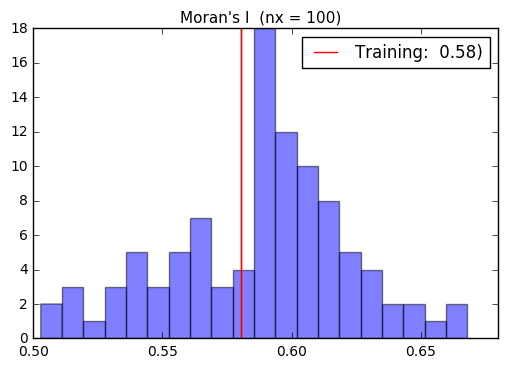

In [28]:
fig = plt.figure()
plt.hist(Is, 20, alpha = .5)
plt.title('Moran\'s I  (nx = {0})  ' .format( nx), fontsize = 11)
plt.axvline(x= Ii, color='r', linestyle='-',
            label = 'Training:  %.2f)' %Ii)
plt.legend(loc= 'best')

printstr = 'I nx={1}; n={0}.pdf'.format(len(Is), nx)
fig.savefig('conserved/{0}'.format(printstr))


In [30]:
# fig = plt.figure()
# plt.hist(count, 20, alpha = .5)
# plt.title('Count (nx = {1}) \n training images count = {0} '
#           .format(np.sum(TI), nx), fontsize = 11)
# plt.axvline(x=np.sum(TI), color='r', linestyle='-')
# printstr = 'count nx={1}; n={0}.pdf'.format(len(count), nx)
# fig.savefig('conserved/{0}'.format(printstr))

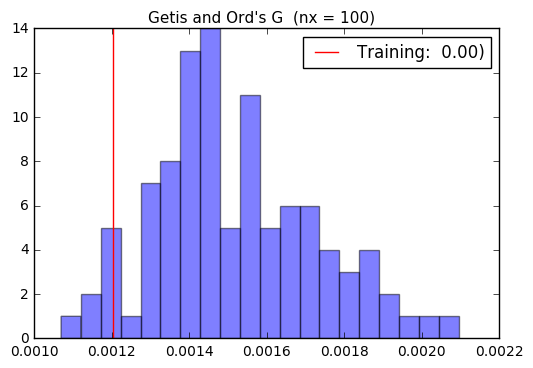

In [33]:
fig = plt.figure()
plt.hist(Gs, 20, alpha = .5)
plt.title('Getis and Ord\'s G  (nx = {0})  '
          .format( nx), fontsize = 11)

plt.axvline(x= Gi, color='r', linestyle='-',
            label = 'Training:  %.2f)' %Gi)

plt.legend()
printstr = 'G nx={1}; n={0}.pdf'.format(len(Gs), nx)
fig.savefig('conserved/{0}'.format(printstr))

In [35]:
# for i, testfile in enumerate(testfiles[:4]):
#     if np.mod(i, 2) == 0:
#         fig = plt.figure(figsize = (9,4))
#         ax = fig.add_subplot(121)
#         plt.imshow(testfile, interpolation='none')
#     elif np.mod(i, 2) == 1:
#         ax = fig.add_subplot(122)
#         plt.imshow(testfile, interpolation='none')